In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import datetime

from sklearn.linear_model.perceptron import Perceptron as Perceptron
from sklearn.linear_model import SGDClassifier as SGDClassifier
from sklearn.model_selection import train_test_split

import os 
os.chdir('..')

from SNN import SNN


# Notebook objective

Here, we test the algorithm by using it to classify randomly created spiketrains.

# Configure experiment

In [16]:
# Samples
n_distortions = 100
noise = 5

n_reps = 1
n_inputs = 25
input_duration = int(300)
input_density = 0.01
sample_seed_1, sample_seed_2 = 0, 1

# SNN
ref_voltage = -0.25
n_transient = 1
v_store_for = 100
sampling_rate = 1

mean_e_e = 12
in_connectivity = 1#0.4
r_ratio = 1
i_to_e_densities = 0


In [17]:

snn = SNN(
            N=800,
            out_halflife = int(input_duration/3),
            use_phase=False,
            drive_tau=0.01,
            capacity=1,
            ref_voltage=ref_voltage,
            ss_voltage=0,
            inhibition=0.,
            # Synapse dynamics
            synapse_str=0.1,
            # Network parameters
            i_to_e_distances=r_ratio,
            i_to_e_densities=i_to_e_densities,
            density_e=1,
            periodic=False,
            mean_e_e=mean_e_e,
            # Input parameters
            n_inputs=n_inputs,
            sampling_rate=sampling_rate,  # (in ms)
            in_connectivity=in_connectivity,
            # Output parameters
            lam_out=0.1,
            n_out=n_inputs,
            readout_tau=0.05,
            # Logging parameters
            v_store_for=v_store_for)


# Make data

## Challenge 1: Different spiketrains

In [20]:

# Make paragon (noiseless) samples
spktrn_spec_1 = {'sample_dim': n_inputs,
                 'duration': input_duration,
                 'sample_density': input_density,
                 'sample_seed': sample_seed_1}
paragon1 = iid_spiketrain(**spktrn_spec_1)

spktrn_spec_2 = {'sample_dim': n_inputs,
                 'duration': input_duration,
                 'sample_density': input_density,
                 'sample_seed': sample_seed_2}
paragon2 = iid_spiketrain(**spktrn_spec_2)



## Taking a look at the 2 paragon spiketrains

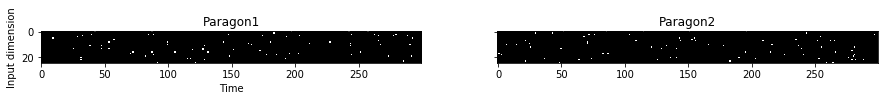

In [36]:
fig, axarr = plt.subplots(1,2, figsize=(15,5), sharey=True)
axarr[0].imshow(paragon1.transpose(), cmap='bone')
axarr[1].imshow(paragon2.transpose(), cmap='bone')
axarr[0].set_title('Paragon1')
axarr[1].set_title('Paragon2')
axarr[0].set_ylabel('Input dimension')
axarr[0].set_xlabel('Time')
plt.show()

## Test the algo 
- For each of the images above, we will create distorted copies of the spiketrains.

- We do so by moving the white pixels an exponentially random distance towards teh left or right.

- This will result in samples coming from 2 classes, that the algo will classify.

- We will repeat the above process multiple times, and get test the algorithm multiple times.



In [9]:

# MC simulation
for _ in range(2):
    # Furnish with noise
    samples = []
    labels = []
    for i, paragon in enumerate([paragon1, paragon2]):
        for _ in range(n_distortions):
            samples += [temporally_distort_sample(paragon, D=noise)]
            labels += [i]#np.random.randint(2)]
    snn.train(np.array(samples), labels=labels, test_fraction=0.8, verbose=True)
    

SNN transformation of inputs ##########
Sample 0 took 0:00:00.141630 to transform.
Sample 1 took 0:00:00.179508 to transform.
Sample 2 took 0:00:00.166555 to transform.
Sample 3 took 0:00:00.148614 to transform.
Sample 4 took 0:00:00.162557 to transform.
Sample 5 took 0:00:00.150597 to transform.
Sample 6 took 0:00:00.176494 to transform.
Sample 7 took 0:00:00.151626 to transform.
Sample 8 took 0:00:00.156581 to transform.
Sample 9 took 0:00:00.157578 to transform.
Sample 10 took 0:00:00.156583 to transform.
Sample 11 took 0:00:00.179521 to transform.
Sample 12 took 0:00:00.140622 to transform.
Sample 13 took 0:00:00.153589 to transform.
Sample 14 took 0:00:00.157579 to transform.
Sample 15 took 0:00:00.150597 to transform.
Sample 16 took 0:00:00.157579 to transform.
Sample 17 took 0:00:00.185505 to transform.
Sample 18 took 0:00:00.141625 to transform.
Sample 19 took 0:00:00.168549 to transform.
Sample 20 took 0:00:00.153585 to transform.
Sample 21 took 0:00:00.150598 to transform.
Sa

# Observations

- When the method fails, it fails utterly - 0.5 accuracy is a coin toss. I need to understand why this is, and also make sure that this is not a spurious result.
- What happens for dense networks?